In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import math

In [2]:
data=pd.read_csv("cubic_zirconia.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
data.shape

(26967, 11)

In [6]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [7]:
math.isnan(0)

False

In [8]:
if ['depth'] !=0 :
    print ('True')
else:
    print ('False')

True


In [9]:
data[data.isnull().sum().index].dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [10]:
data.depth=data.depth.fillna(data.depth.mean())

In [11]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [12]:
df_num = data.select_dtypes(['float64','int64'])
df_cat = data.select_dtypes(['object'])

In [13]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   depth       26967 non-null  float64
 3   table       26967 non-null  float64
 4   x           26967 non-null  float64
 5   y           26967 non-null  float64
 6   z           26967 non-null  float64
 7   price       26967 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.6 MB


In [14]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cut      26967 non-null  object
 1   color    26967 non-null  object
 2   clarity  26967 non-null  object
dtypes: object(3)
memory usage: 632.2+ KB


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='median')

In [16]:
imr = imputer.fit(df_num)
df_num = pd.DataFrame(imr.transform(df_num), columns=df_num.columns)

In [17]:
df_num.isnull().sum()

Unnamed: 0    0
carat         0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [18]:
df_num.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.394481,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [19]:
df_new = pd.concat([df_num, df_cat], axis=1, join='inner')

In [20]:
df_new.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut,color,clarity
0,1.0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,Ideal,E,SI1
1,2.0,0.33,60.8,58.0,4.42,4.46,2.70,984.0,Premium,G,IF
2,3.0,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,Very Good,E,VVS2
3,4.0,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,Ideal,F,VS1
4,5.0,0.31,60.4,59.0,4.35,4.43,2.65,779.0,Ideal,F,VVS1


In [21]:
df_new.shape

(26967, 11)

In [22]:
df = df_new.drop(['Unnamed: 0'],axis=1)

In [23]:
df.head()

,carat,depth,table,x,y,z,price,cut,color,clarity
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,Ideal,E,SI1
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,Premium,G,IF
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,Very Good,E,VVS2
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,Ideal,F,VS1
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,Ideal,F,VVS1


In [24]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [25]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 10)
After (26933, 10)


In [26]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


Univariate Analysis

<AxesSubplot:xlabel='price', ylabel='Density'>

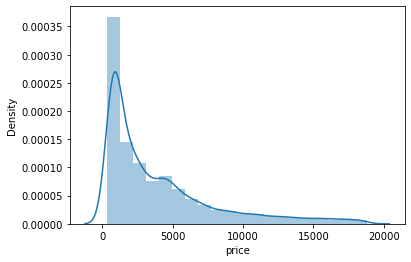

In [27]:
sns.distplot(df.price,bins=20) 

<AxesSubplot:xlabel='carat', ylabel='Density'>

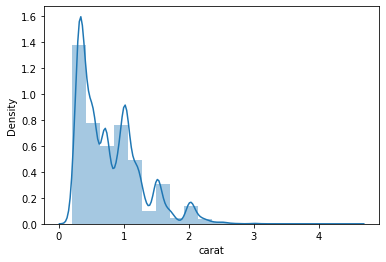

In [28]:
sns.distplot(df.carat,bins=20) 

<AxesSubplot:xlabel='depth', ylabel='Density'>

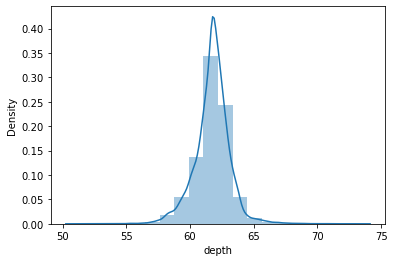

In [29]:
sns.distplot(df.depth,bins=20) 

<AxesSubplot:xlabel='table', ylabel='Density'>

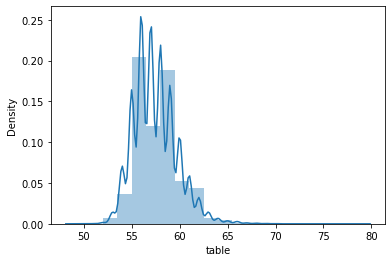

In [30]:
sns.distplot(df.table,bins=20) 

<AxesSubplot:xlabel='x', ylabel='Density'>

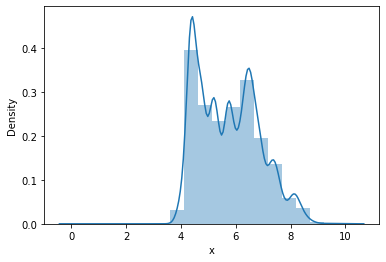

In [31]:
sns.distplot(df.x,bins=20) 

<AxesSubplot:xlabel='y', ylabel='Density'>

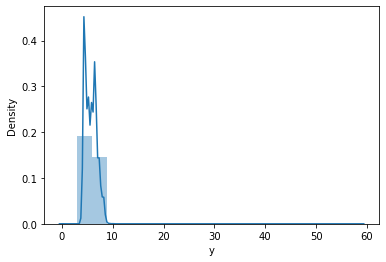

In [32]:
sns.distplot(df.y,bins=20) 

<AxesSubplot:xlabel='z', ylabel='Density'>

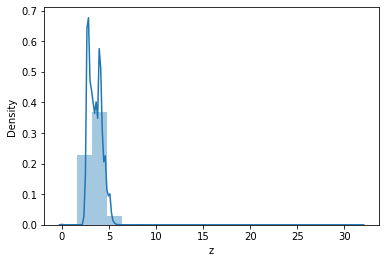

In [33]:
sns.distplot(df.z,bins=20) 

<AxesSubplot:xlabel='cut', ylabel='count'>

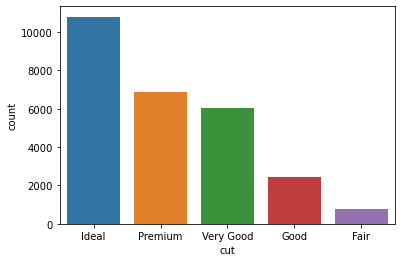

In [34]:
fig_dims = (20, 15)
sns.countplot(df["cut"])

<AxesSubplot:xlabel='color', ylabel='count'>

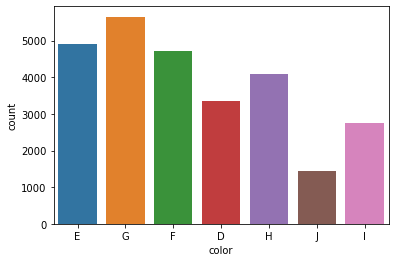

In [35]:
fig_dims = (20, 15)
sns.countplot(df["color"])

<AxesSubplot:xlabel='clarity', ylabel='count'>

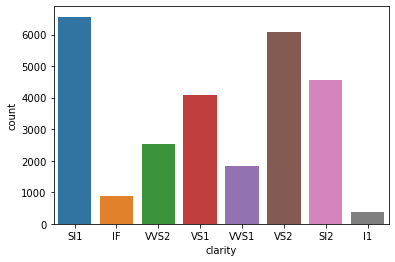

In [36]:
fig_dims = (20, 15)
sns.countplot(df["clarity"])

Bivariate Analysis

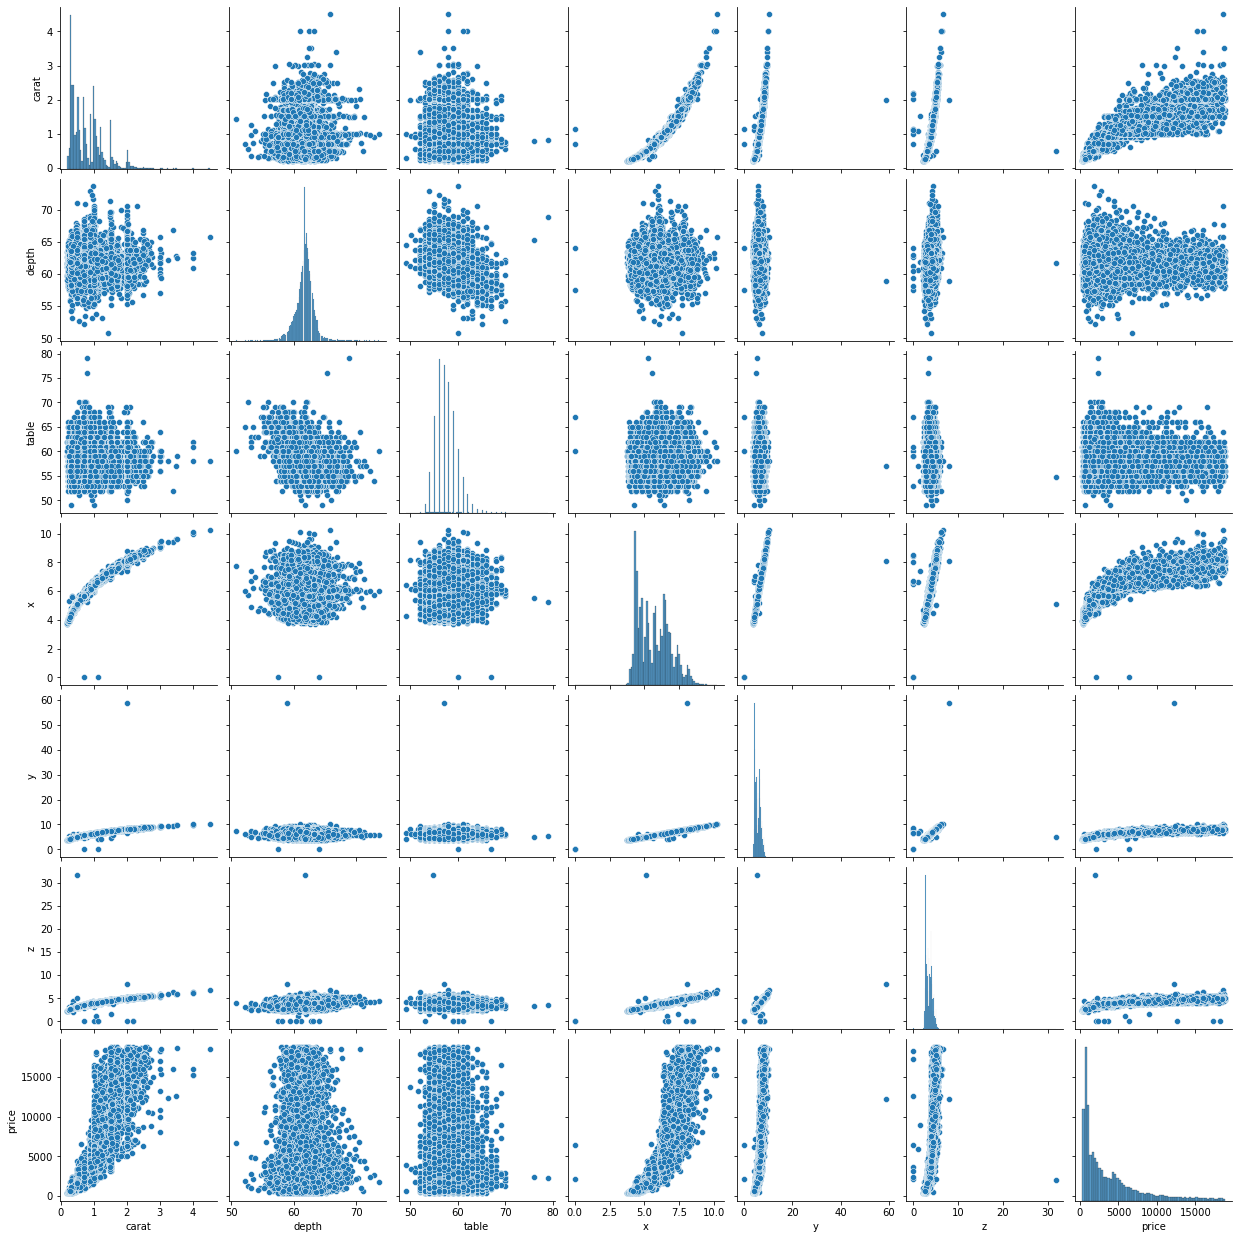

In [37]:
sns.pairplot(df)
plt.show()

In [38]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.034741,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.034741,1.000000,-0.293720,-0.018145,-0.024139,0.097659,-0.002855
table,0.181539,-0.293720,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018145,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024139,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.097659,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002855,0.126844,0.886554,0.856441,0.850682,1.000000


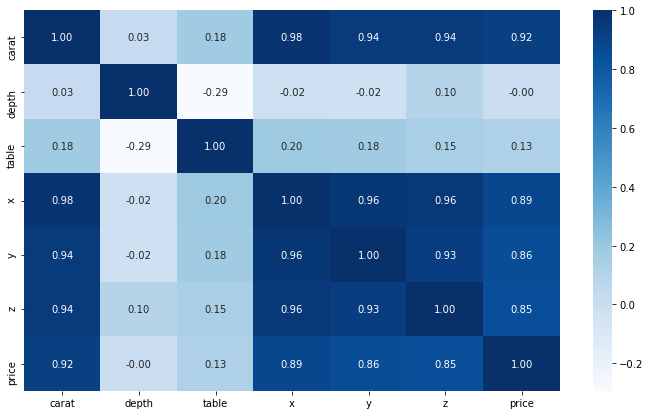

In [39]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

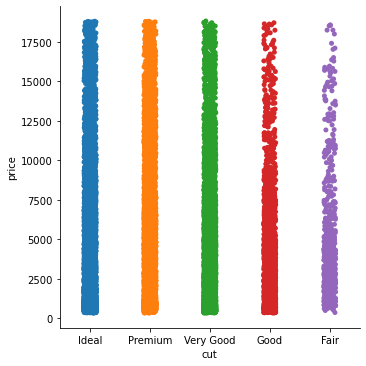

In [40]:
sns.catplot(x="cut", y="price", data=df)

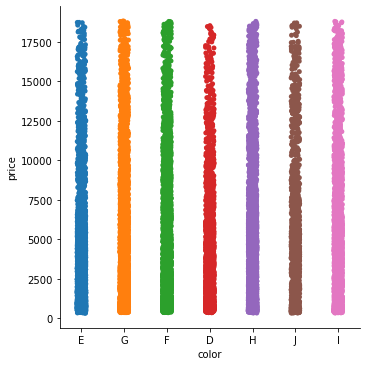

In [41]:
sns.catplot(x="color", y="price", data=df)

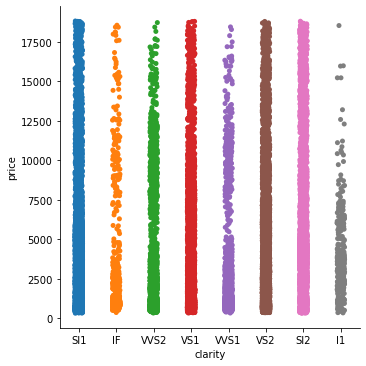

In [42]:
sns.catplot(x="clarity", y="price", data=df)

Multivariate analysis

<AxesSubplot:xlabel='cut', ylabel='price'>

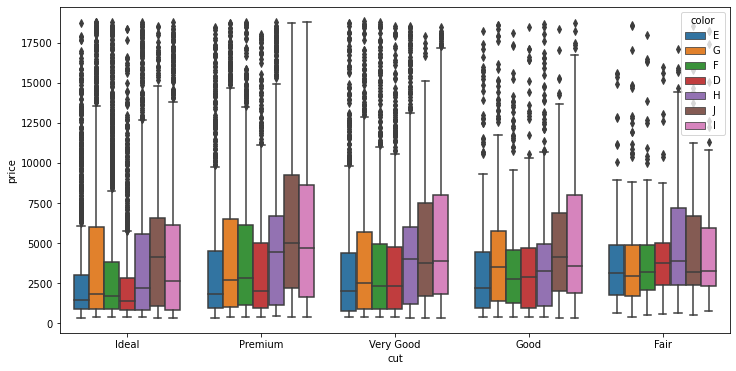

In [43]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='cut', y='price', hue='color',data=df)

<AxesSubplot:xlabel='cut', ylabel='price'>

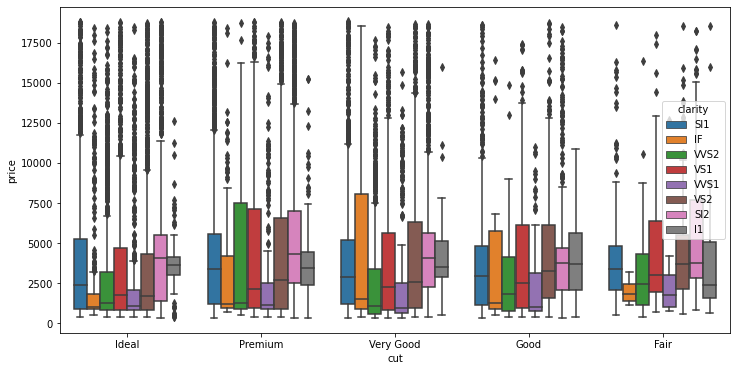

In [44]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='cut', y='price', hue='clarity',data=df)

<AxesSubplot:xlabel='clarity', ylabel='price'>

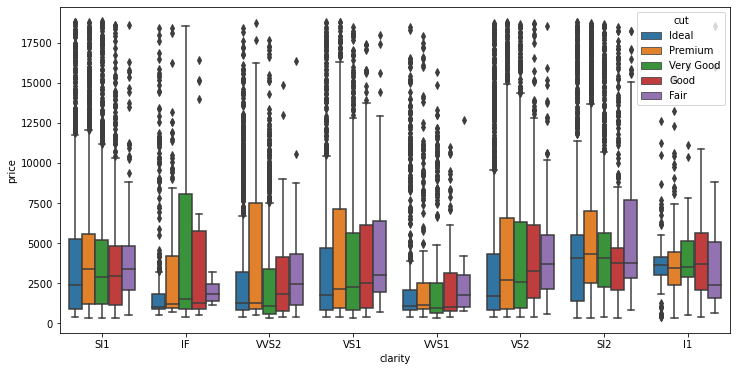

In [45]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='clarity', y='price', hue='cut',data=df)

<AxesSubplot:xlabel='clarity', ylabel='price'>

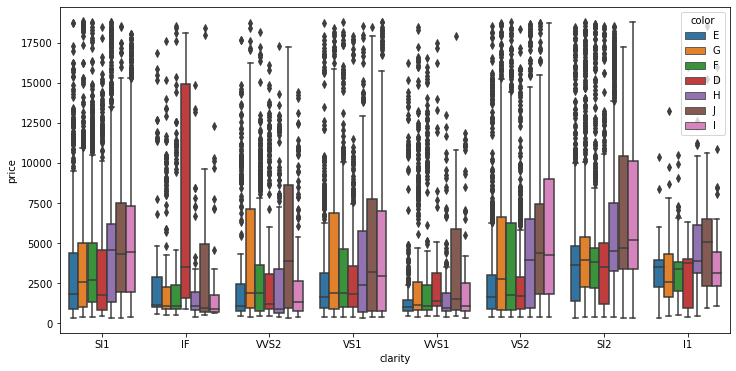

In [46]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='clarity', y='price', hue='color',data=df)

<AxesSubplot:xlabel='color', ylabel='price'>

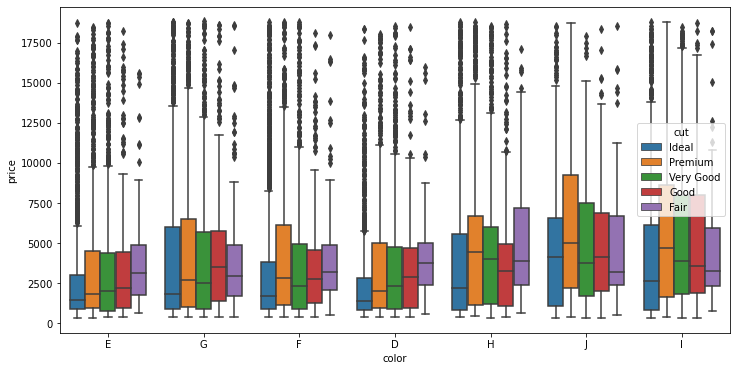

In [47]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='color', y='price', hue='cut',data=df)

<AxesSubplot:xlabel='color', ylabel='price'>

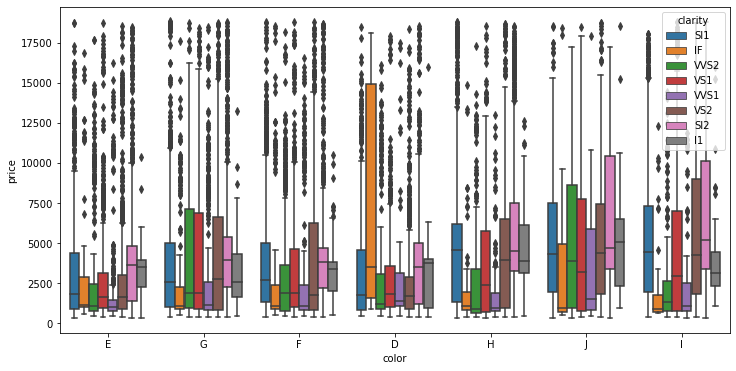

In [48]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='color', y='price', hue='clarity',data=df)

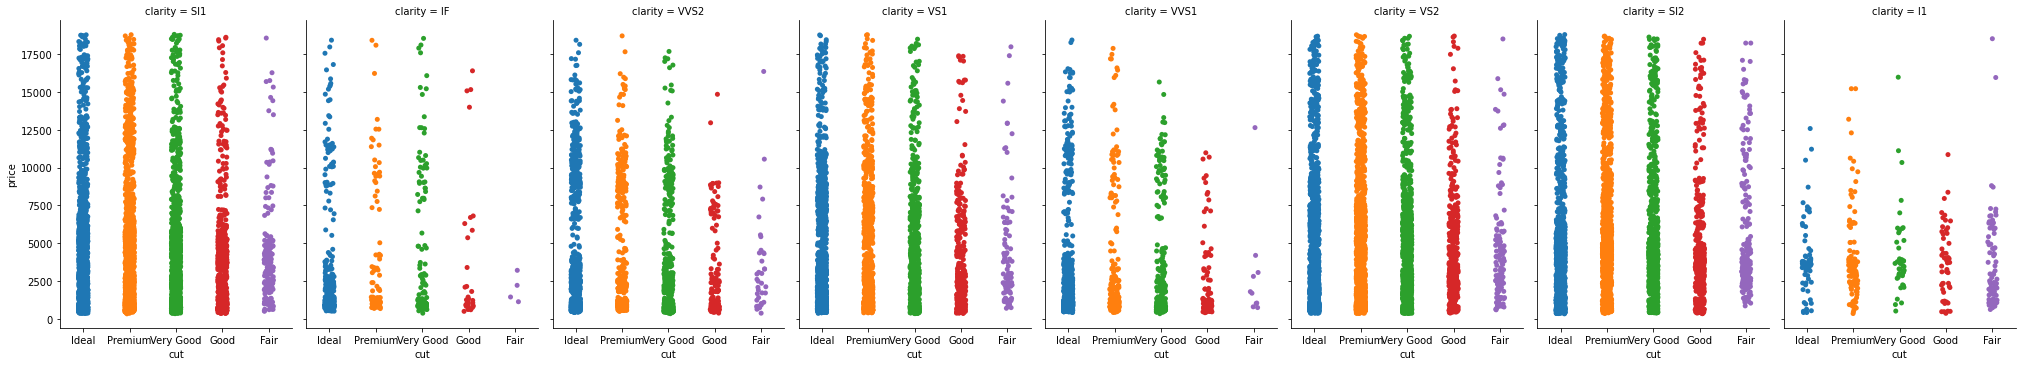

In [49]:
sns.catplot(x="cut", y="price",
            col="clarity", aspect=.7,
            data=df)

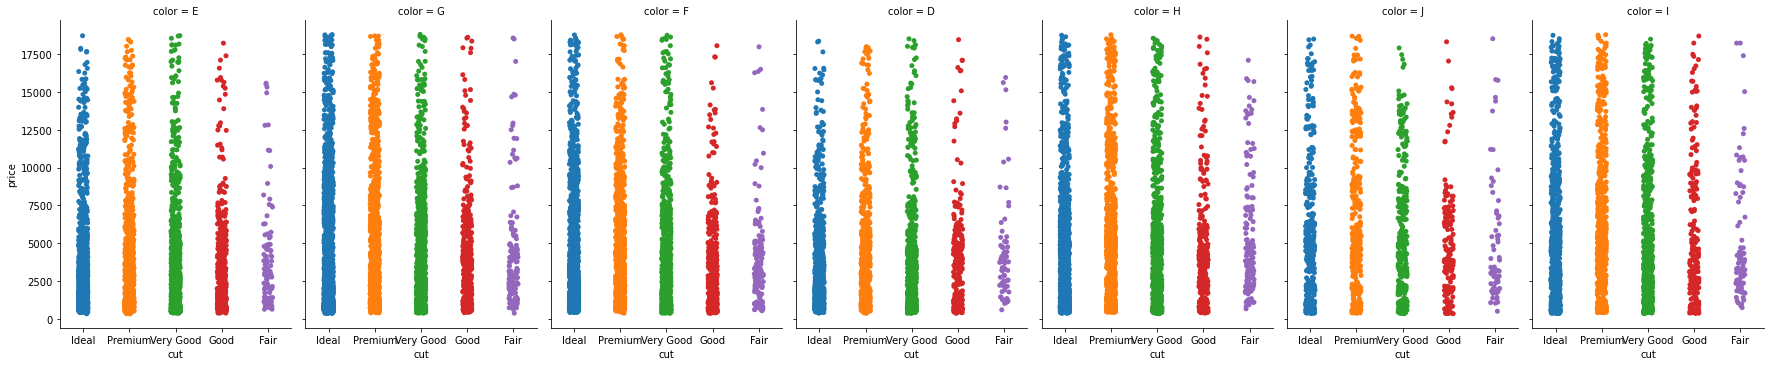

In [50]:
sns.catplot(x="cut", y="price",
            col="color", aspect=.7,
            data=df)

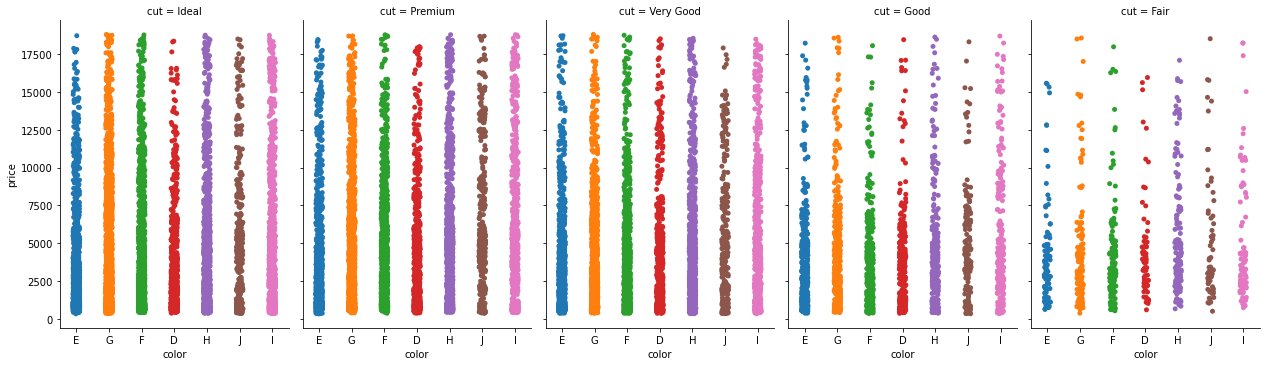

In [51]:
sns.catplot(x="color", y="price",
            col="cut", aspect=.7,
            data=df)

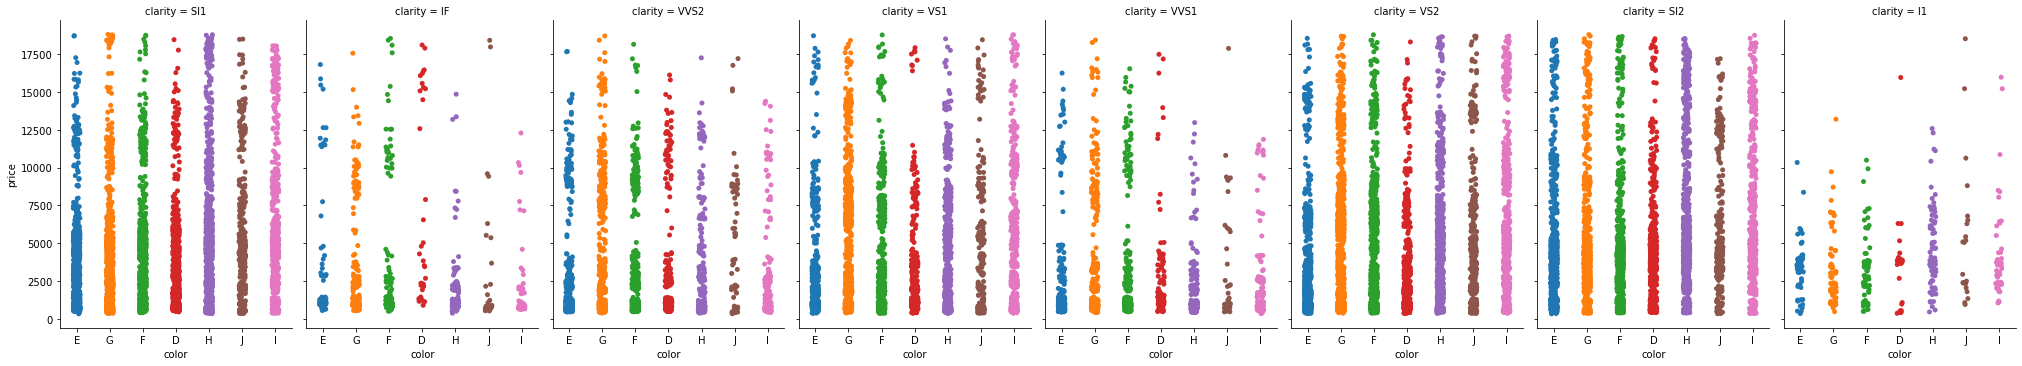

In [52]:
sns.catplot(x="color", y="price",
            col="clarity", aspect=.7,
            data=df)

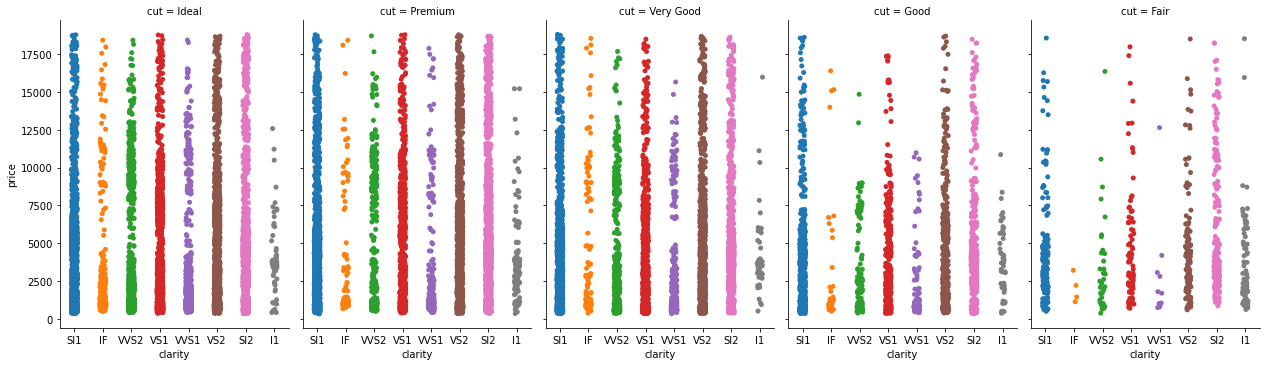

In [53]:
sns.catplot(x="clarity", y="price",
            col="cut", aspect=.7,
            data=df)

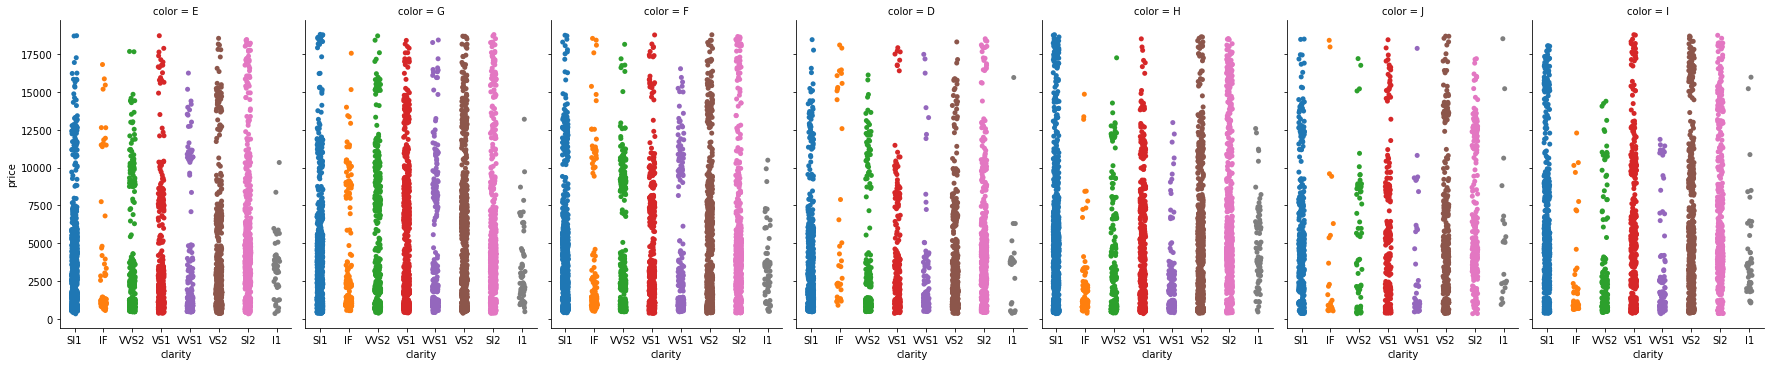

In [54]:
sns.catplot(x="clarity", y="price",
            col="color", aspect=.7,
            data=df)

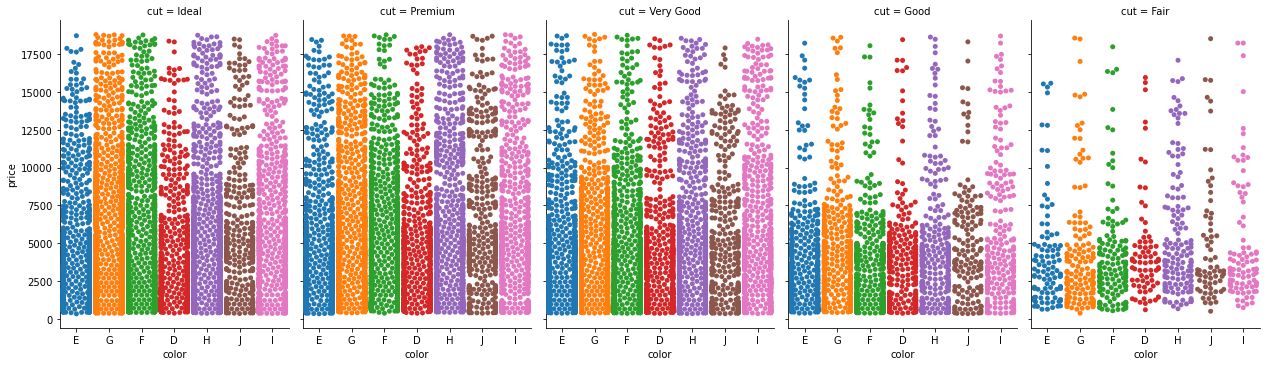

In [55]:
sns.catplot(x="color", y="price",
            col="cut", aspect=.7,
            kind="swarm", data=df)

In [56]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [57]:
# VARIABLE: CUT
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [58]:
# VARIABLE: COLOR

df['color']=np.where(df['color'] =='D', '6', df['color'])
df['color']=np.where(df['color'] =='E', '5', df['color'])
df['color']=np.where(df['color'] =='F', '4', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '2', df['color'])
df['color']=np.where(df['color'] =='I', '1', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])

In [59]:
# VARIABLE: CLARITY

df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [60]:
# Converting Data Type of above 3 string type variables: 

df['cut'] = df['cut'].astype('float64')
df['color'] = df['color'].astype('float64')
df['clarity'] = df['clarity'].astype('float64')

In [61]:
X = df.drop('price', axis=1)
y = df[['price']]

In [62]:
X.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,0.30,62.1,58.0,4.27,4.29,2.66,4.0,5.0,2.0
1,0.33,60.8,58.0,4.42,4.46,2.70,3.0,3.0,7.0
2,0.90,62.2,60.0,6.04,6.12,3.78,2.0,5.0,5.0
3,0.42,61.6,56.0,4.82,4.80,2.96,4.0,4.0,4.0
4,0.31,60.4,59.0,4.35,4.43,2.65,4.0,4.0,6.0


In [63]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

Linear Regression Model

In [65]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [66]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11021.54835937304
The coefficient for depth is -79.53522600874341
The coefficient for table is -30.35784408975391
The coefficient for x is -939.4185962735189
The coefficient for y is 10.64267786264863
The coefficient for z is -41.380948639105206
The coefficient for cut is 108.11086114973003
The coefficient for color is 333.8752892177731
The coefficient for clarity is 505.36788568697625


In [67]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4276.341879714038


In [68]:
# R square on training data
regression_model.score(X_train, y_train)

0.9085604986766604

In [69]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9078450468506659

In [70]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1212.4184730329

In [71]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1230.273836985054

In [75]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [76]:
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 78.51812763570591
depth ---> 546.2580753400821
table ---> 540.0114801225117
x ---> 1086.0644471876583
y ---> 347.5128926066369
z ---> 338.70536484411446
cut ---> 8.888929842294896
color ---> 5.541695548766907
clarity ---> 5.322607600513004


Linear Regression using statsmodels

In [77]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut,color,clarity,price
22114,0.34,62.4,60.0,4.41,4.44,2.76,2.0,2.0,3.0,537.0
2275,0.30,61.2,55.0,4.35,4.31,2.65,4.0,5.0,3.0,844.0
19183,0.50,62.5,57.0,5.09,5.05,3.17,4.0,3.0,2.0,1240.0
5030,1.10,63.3,56.0,6.53,6.58,4.15,1.0,5.0,1.0,4065.0
25414,1.02,61.1,62.0,6.54,6.49,3.98,3.0,4.0,1.0,4057.0


In [78]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18853 entries, 22114 to 235
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    18853 non-null  float64
 1   depth    18853 non-null  float64
 2   table    18853 non-null  float64
 3   x        18853 non-null  float64
 4   y        18853 non-null  float64
 5   z        18853 non-null  float64
 6   cut      18853 non-null  float64
 7   color    18853 non-null  float64
 8   clarity  18853 non-null  float64
 9   price    18853 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [79]:
data_train.rename(columns = {"cut_Good": "cut_good", "cut_Ideal": "cut_ideal", 'cut_Premium' : 'cut_premium','cut_Very Good': 'cut_very good', 'color_E': 'color_e', 'color_F': 'color_f', 'color_G': 'color_g','color_H': 'color_h', 'color_I': 'color_i', 'color_J': 'color_j','clarity_IF': 'clarity_if','clarity_SI1': 'clarity_si1', 'clarity_SI2': 'clarity_si2', 'clarity_VS1': 'clarity_vs1', 'clarity_VS2': 'clarity_vs2', 'clarity_VVS1': 'clarity_vvs1', 'clarity_VVS2': 'clarity_vvs2'}, 
                      inplace = True) 

data_test.rename(columns = {"cut_Good": "cut_good", "cut_Ideal": "cut_ideal", 'cut_Premium' : 'cut_premium','cut_Very Good': 'cut_very good', 'color_E': 'color_e', 'color_F': 'color_f', 'color_G': 'color_g','color_H': 'color_h', 'color_I': 'color_i', 'color_J': 'color_j','clarity_IF': 'clarity_if','clarity_SI1': 'clarity_si1', 'clarity_SI2': 'clarity_si2', 'clarity_VS1': 'clarity_vs1', 'clarity_VS2': 'clarity_vs2', 'clarity_VVS1': 'clarity_vvs1', 'clarity_VVS2': 'clarity_vvs2'}, 
                      inplace = True) 

In [80]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity',
       'price'],
      dtype='object')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [82]:
X_con=sm.add_constant(X)

In [83]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, y, test_size=0.30 , random_state=1)

In [84]:
model = sm.OLS(y_trainc,X_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.080e+04
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:59:44   Log-Likelihood:            -1.6061e+05
No. Observations:               18853   AIC:                         3.212e+05
Df Residuals:                   18843   BIC:                         3.213e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4276.3419    714.290      5.987      0.000    2876.270    5676.414
carat       1.102e+04     91.409    120.574      0.000    1.08e+04    1.12e+04
depth        -79.5352      7.857    -10.123      0.000     -94.935     -64.136
table        -30.3578      4.988     -6.086      0.000     -40.135     -20.581
x           -939.4186     49.666    -18.915      0.000   -1036.768    -842.070
y             10.6427     23.769      0.448      0.654     -35.946      57.232
z            -41.3809     39.588     -1.045      0.296    -118.977      36.215
cut          108.1109      9.746     11.093      0.000      89.007     127.214
color        333.8753      5.485     60.872      0.000     323.124     344.626
clarity      505.3679      5.919     85.379      0.000     493.766     516.970
==============================================================================
Omnibus:                     3976.124   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           158721.806
Skew:                           0.103   Prob(JB):                         0.00
Kurtosis:                      17.213   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 90.856 %


In [86]:
ypred = model.predict(X_testc)
print(ypred)

16997     6490.468680
24457     4434.205343
16612     9753.689748
308       4165.367365
26652    13616.349927
             ...     
25016     1246.205059
8485      6031.196460
26891     4750.427081
17455     4227.973628
26169     4619.033603
Length: 8080, dtype: float64


In [87]:
print("The Root Mean Square Error (RMSE) of the model is for the training set is",mean_squared_error(model.fittedvalues,y_trainc,squared=False))

The Root Mean Square Error (RMSE) of the model is for the training set is 1212.4184730329


In [88]:
model.predict(X_trainc)

22114    -570.518407
2275      513.232213
19183     671.499665
5030     5712.175642
25414    4702.311374
            ...     
10962    1844.061988
17304    2357.019006
5193     7110.917499
12179    5621.031332
235      8914.913716
Length: 18853, dtype: float64

In [89]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_testc,ypred)))

The Root Mean Square Error (RMSE) of the model is for testing set is 1230.273836985052
